In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from itertools import islice
import statsmodels.api as sm
sns.set()
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [2]:
matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

In [3]:
def parse_timestamp(el):
    b = datetime.datetime.strptime(el, fmt)
    return b

In [4]:
fmt = '%Y-%m-%d %H:%M:%S'

In [5]:
def trim_latlng(x):
    return round(x,4)

In [6]:
url = "/bigdata/jelicicna/mobility_data_2020/anlysis_data_nextbike_2020-02.csv"
df = pd.read_csv(url, sep=';', low_memory=False)

In [7]:
url2 = "/bigdata/jelicicna/clustering_datasets/locations_for_clustering_2020-02.csv"
df_locations = pd.read_csv(url2, sep=';', low_memory=False)

In [ ]:
df['ride_begin'] = df['ride_begin'].map(parse_timestamp)
df['ride_end'] = df['ride_end'].map(parse_timestamp)

In [ ]:
df['lat_begin'] = df['lat_begin'].map(trim_latlng)
df['lng_begin'] = df['lng_begin'].map(trim_latlng)
df['lat_end'] = df['lat_end'].map(trim_latlng)
df['lng_end'] = df['lng_end'].map(trim_latlng)

In [ ]:
#adding tracking of original indexes for evaluation of results
df.reset_index(inplace=True)
df.rename({'index':'org_index'}, axis=1, inplace=True)

In [ ]:
bikes = df[["name"]].drop_duplicates().reset_index(drop=True)
bikes["bike_id"]=bikes.index
bikes = bikes[["bike_id", "name"]]
bikes.head() #df with 2 columns containing bike id and corresponding bike names

In [ ]:
#adding bike id to df
df = pd.merge(df, bikes, on='name', how='outer')

In [63]:
df_locations

,loc_id,latlng,lat,lng,cluster_kmns,cluster_agg
0,0,"[50.9846, 6.9655]",50.9846,6.9655,4,0
1,1,"[50.9607, 6.9464]",50.9607,6.9464,15,12
2,2,"[50.9385, 6.9448]",50.9385,6.9448,13,1
3,3,"[50.9693, 7.0164]",50.9693,7.0164,2,23
4,4,"[50.9476, 6.9623]",50.9476,6.9623,7,15
5,5,"[50.9484, 6.8815]",50.9484,6.8815,26,14
6,6,"[50.9393, 6.9327]",50.9393,6.9327,3,27
7,7,"[50.9652, 6.8849]",50.9652,6.8849,6,24
8,8,"[50.9307, 6.9476]",50.9307,6.9476,29,5
9,9,"[50.913, 6.9404]",50.9130,6.9404,10,3


## Deciding on an optimal number of clusters

### Elbow method

In [ ]:
#separate data
x = df_locations.iloc[:,2:4]

In [ ]:
x.head()

In [ ]:
potential_k = []
for k in range(10,170,10):
    potential_k.append(k)

In [ ]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in potential_k:
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(potential_k, sse)
plt.xticks(potential_k)
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
kl = KneeLocator(range(10,170,10), sse, curve="convex", direction="decreasing")
kl.elbow

In [ ]:
#assigning the ideal result of the elbow method as a future k for clustering
clust_k = kl.elbow

### Silhouette coefficient

In [ ]:
# A list with sc for each k to evalueate previous conclusion
silhouette_coefficients = []

for k in range(10, 170, 10):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(x)
    score = silhouette_score(x, kmeans.labels_)
    silhouette_coefficients.append(score)

plt.style.use("fivethirtyeight")
plt.plot(range(10, 170, 10), silhouette_coefficients)
plt.xticks(range(10, 170, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

## Clustering

In [ ]:
x = x.to_numpy()

In [ ]:
kmeans = KMeans(clust_k)
kmeans.fit(x)

In [ ]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

In [ ]:
len(identified_clusters)

In [ ]:
df_locations['cluster'] = identified_clusters

In [ ]:
df_locations.head(2)

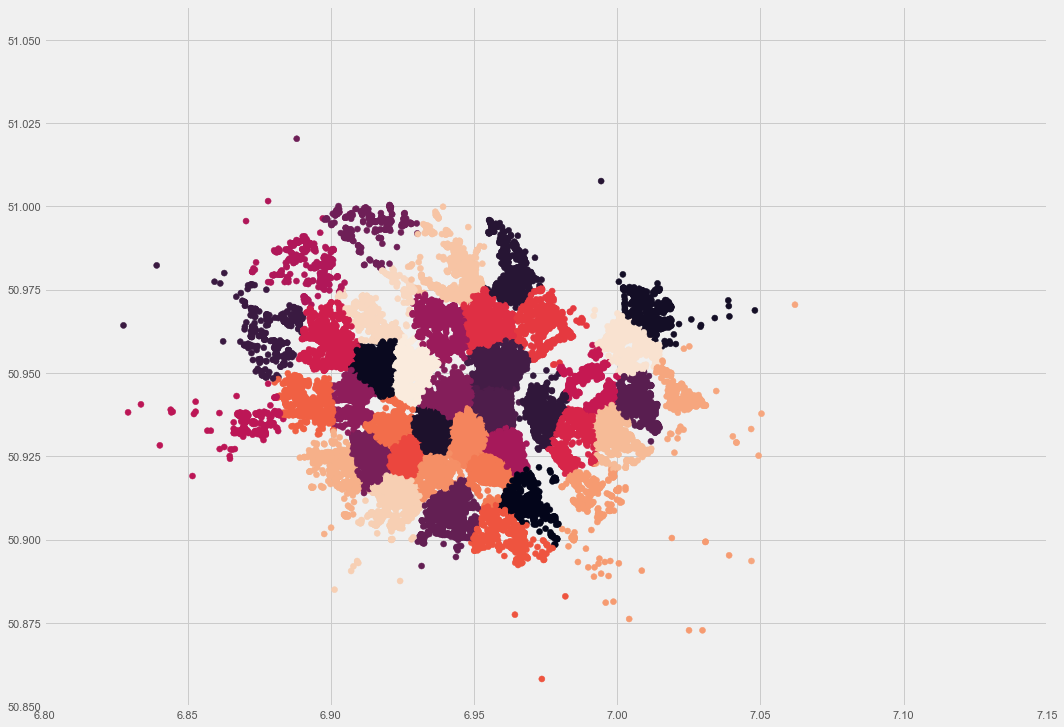

In [70]:
plt.scatter(df_locations['lng'],df_locations['lat'],c=df_locations['cluster_kmns'],cmap='rocket')
plt.xlim(6.80,7.15)
plt.ylim(50.85,51.06)
plt.show()

In [ ]:
start_loc = []
for index, row in df.iterrows():
    loc_str = str([row['lat_begin'],row['lng_begin']])
    start_loc.append(loc_str)

In [ ]:
end_loc = []
for index, row in df.iterrows():
    loc_str = str([row['lat_end'],row['lng_end']])
    end_loc.append(loc_str)

In [ ]:
len(start_loc)

In [ ]:
len(end_loc)

In [ ]:
df

In [ ]:
df['latlng'] = start_loc #setting starting locations as a joint column

In [ ]:
df_merge_loc = df_locations[['loc_id', 'latlng', 'cluster']]

In [ ]:
df_merge_loc

In [ ]:
df_clusters = pd.merge(df, df_merge_loc, on='latlng', how='left')

In [ ]:
df_clusters

In [ ]:
cls = {'latlng':'latlng_start','loc_id':'loc_id_start', 'cluster':'cluster_start'}
df_clusters.rename(columns=cls, inplace=True) #renaming columns to match data about the start of the ride

In [ ]:
len(df_clusters)

In [ ]:
df_clusters['latlng'] = end_loc #setting ending locations as a joint column

In [ ]:
df_clusters = pd.merge(df_clusters, df_merge_loc, on='latlng', how='left')

In [ ]:
df_clusters

In [ ]:
cls = {'latlng':'latlng_end','loc_id':'loc_id_end', 'cluster':'cluster_end'}
df_clusters.rename(columns=cls, inplace=True) #renaming columns to match data about the start of the ride

In [ ]:
df_g = df_clusters[['ride_time','cluster_start','cluster_end']]

In [ ]:
df_g = df_g.groupby(['cluster_start','cluster_end']).count()

In [ ]:
df_g.reset_index(inplace=True)

In [ ]:
df_g.rename({'ride_time':'ride_count'}, axis=1, inplace=True)
df_g

In [ ]:
df_g['cluster_start'].value_counts()

In [ ]:
df_locations.rename({'cluster':'cluster_kmns'}, inplace=True, axis=1)

In [ ]:
df_locations.head()

### Agglomerative Clustering with chosen k

In [ ]:
len(x)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
clustering = AgglomerativeClustering(clust_k).fit(x)
clustering

In [ ]:
clustering.labels_

In [ ]:
df_locations['cluster_agg'] = clustering.labels_

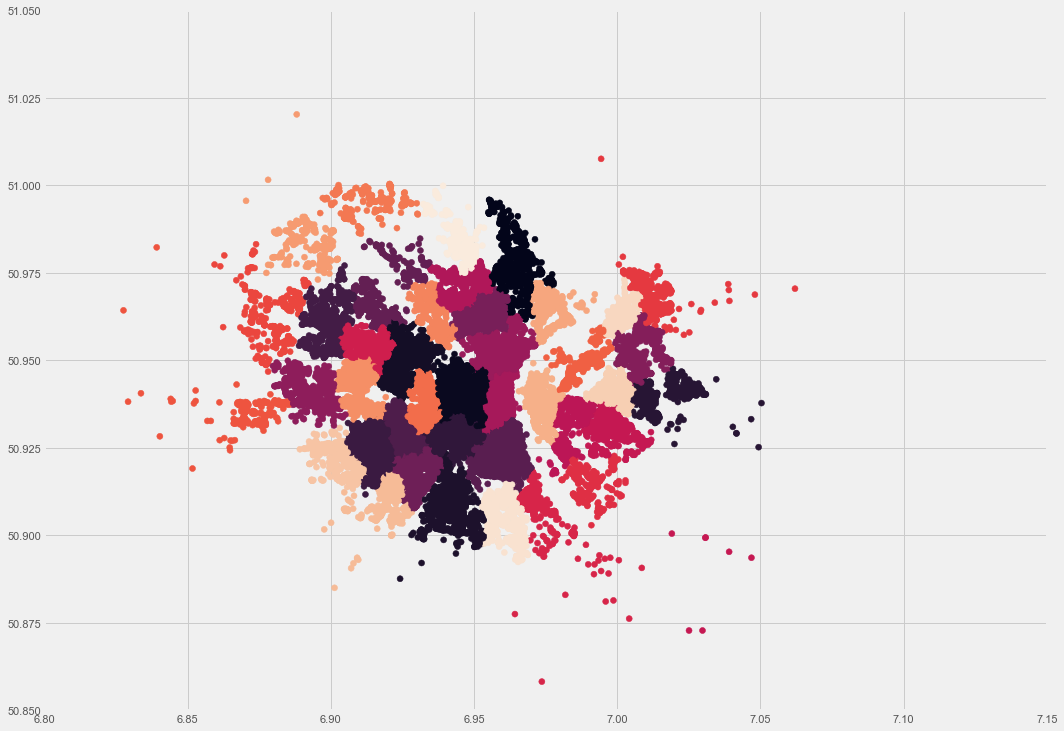

In [68]:
plt.scatter(df_locations['lng'],df_locations['lat'],c=df_locations['cluster_agg'],cmap='rocket')
plt.xlim(6.80,7.15)
plt.ylim(50.85,51.05)
plt.show()

In [ ]:
df_locations.head(20)

In [ ]:
type(df_locations['latlng'])

In [66]:
len(df_locations)

41582

In [64]:
df_locations['cluster_kmns'].value_counts(dropna=False)

3     2057
8     1992
13    1687
1     1604
7     1572
22    1533
10    1496
29    1452
24    1440
39    1407
12    1331
5     1314
34    1290
38    1278
36    1197
28    1106
16    1091
30    1072
20    1069
9     1045
0     1000
27     955
21     948
15     932
14     893
26     881
2      849
4      816
23     813
35     760
19     720
25     646
37     598
33     576
32     432
31     419
6      383
17     357
18     303
11     268
Name: cluster_kmns, dtype: int64

In [65]:
df_locations['cluster_agg'].value_counts(dropna=False)

1     2588
9     2278
16    1820
3     1786
2     1759
5     1747
6     1735
8     1588
15    1555
11    1509
27    1357
12    1335
20    1287
33    1269
0     1176
30    1117
19    1075
13    1058
36    1005
7      970
14     925
18     889
38     852
17     831
4      770
23     763
34     673
37     649
10     597
35     574
21     570
29     468
32     464
39     456
26     413
24     408
22     378
25     322
31     316
28     250
Name: cluster_agg, dtype: int64